In [4]:
!pip install yfinance pandas matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Using Apple (AAPL) 
data = yf.download('AAPL', start='2024-01-01', end='2025-01-01')
data.head

/tmp/ipykernel_1005/1118925962.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2024-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.head of Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  183.903229  186.677036  182.169601  185.399096  82488700
2024-01-03  182.526215  184.140970  181.713879  182.496496  58414500
2024-01-04  180.208145  181.377098  179.187783  180.445890  71983600
2024-01-05  179.484940  181.050159  178.484394  180.287374  62379700
2024-01-08  183.823959  183.863594  179.801946  180.386422  59144500
...                ...         ...         ...         ...       ...
2024-12-24  257.037506  257.047440  254.140589  254.339701  23234700
2024-12-26  257.853790  258.928945  256.470064  257.027541  27237100
2024-12-27  254.439224  257.535238  251.920617  256.669129  42355300
2024-12-30  251.064499  252.358649  249.621030  251.094363  35557500
2024-12-31  249.292511  252.139635  248.306963  251.303420  39480700

[25

In [3]:
#Short term and long term moving averages
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()

In [ ]:
#Initializing signal column
data['Signal'] = 0

#Properly assign signals using iloc 
signal_values = np.where(data['SMA20'][20:] > data['SMA50'][20:], 1, 0)
data.iloc[20:, data.columns.get_loc('Signal')] = signal_values

In [ ]:
#Prevent 'look ahead bias'
data['Signal'] = data['Signal'].shift(1)

In [ ]:
#Now create position column based on the signal changes
data['Position'] = data['Signal'].diff()

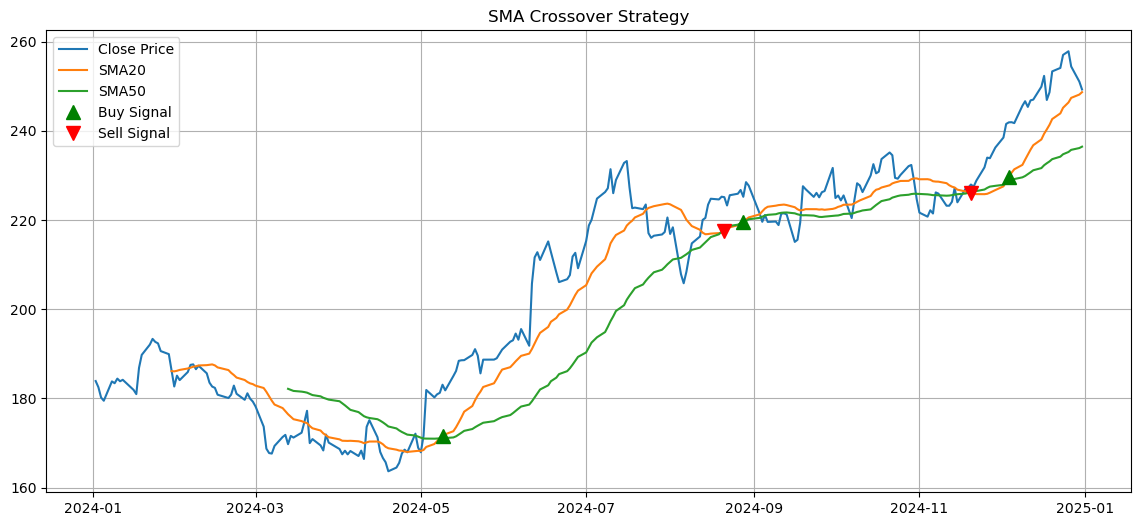

In [12]:
#Plotting the strategy
plt.figure(figsize=(14,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA20'], label='SMA20')
plt.plot(data['SMA50'], label='SMA50')
plt.plot(data[data['Position'] == 1].index,
         data['SMA20'][data['Position'] == 1],
             '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['Position'] == -1].index,
         data['SMA20'][data['Position'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')
plt.title('SMA Crossover Strategy')
plt.legend()
plt.grid()
plt.show()